<a href="https://colab.research.google.com/github/harsha1067/ASSIGNMENTS/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf 
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
df = pd.read_csv("Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df1 = df.rename({'R&D Spend': 'RDS','Administration': 'Admin', 'Marketing Spend':'MS'},axis=1)
df1

,RDS,Admin,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
df1[df1.duplicated()]

,RDS,Admin,MS,State,Profit


In [6]:
df1.describe()

,RDS,Admin,MS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df1.corr()

<ipython-input-7-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,RDS,Admin,MS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


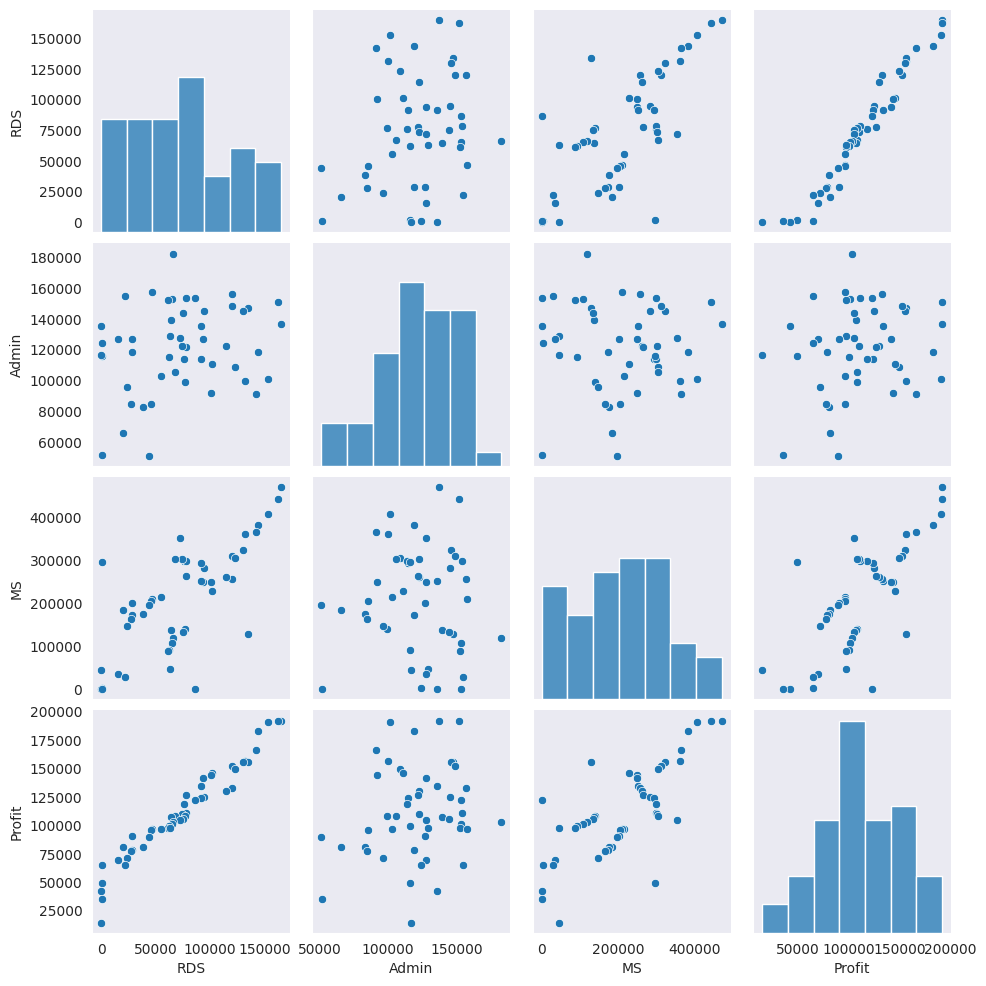

In [8]:
sns.set_style(style='dark')
sns.pairplot(df1)

In [9]:
model=smf.ols('Profit~RDS+Admin+MS', data=df1).fit()

In [10]:
model.params

Intercept    50122.192990
RDS              0.805715
Admin           -0.026816
MS               0.027228
dtype: float64

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           4.53e-30
Time:                        11:10:55   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
print(model.tvalues, '\n', model.pvalues)

Intercept     7.626218
RDS          17.846374
Admin        -0.525507
MS            1.655077
dtype: float64 
 Intercept    1.057379e-09
RDS          2.634968e-22
Admin        6.017551e-01
MS           1.047168e-01
dtype: float64


In [13]:
p=smf.ols("Profit~RDS",data=df1).fit()
p.tvalues, p.pvalues

(Intercept    19.320288
 RDS          29.151139
 dtype: float64,
 Intercept    2.782697e-24
 RDS          3.500322e-32
 dtype: float64)

In [14]:
x = smf.ols("Profit~Admin", data=df1).fit()
x.tvalues, x.pvalues 

(Intercept    3.040044
 Admin        1.419493
 dtype: float64,
 Intercept    0.003824
 Admin        0.162217
 dtype: float64)

In [15]:
y= smf.ols("Profit~MS",data=df1).fit()
y.tvalues, y.pvalues

(Intercept    7.808356
 MS           7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MS           4.381073e-10
 dtype: float64)

In [16]:
z=smf.ols("Profit~Admin+MS",data=df1).fit()
z.tvalues, z.pvalues

(Intercept    1.142741
 Admin        2.467779
 MS           8.281039
 dtype: float64,
 Intercept    2.589341e-01
 Admin        1.729198e-02
 MS           9.727245e-11
 dtype: float64)

In [17]:
#CALCULATING VIF
rsq_q=smf.ols("RDS~Admin+MS",data=df1).fit().rsquared
Vif_q=1/(1-rsq_q)

rsq_s=smf.ols("Admin~RDS+MS",data=df1).fit().rsquared
Vif_s=1/(1-rsq_s)

rsq_r=smf.ols("MS~RDS+Admin",data=df1).fit().rsquared
Vif_r=1/(1-rsq_r)

df2={'Variables':['RDS','Admin','MS'],'Vif':[Vif_q,Vif_s,Vif_r]}
Vif_df=pd.DataFrame(df2)
Vif_df 

,Variables,Vif
0,RDS,2.468903
1,Admin,1.175091
2,MS,2.326773


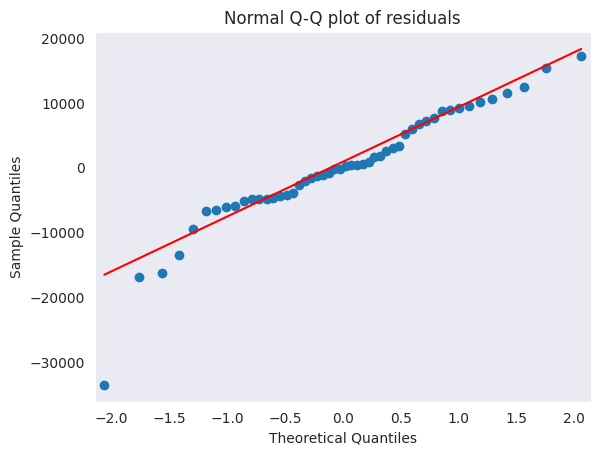

In [18]:
#Residual Analysis
qqplot = sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [19]:
list(np.where(model.resid<100))

[array([ 0,  4,  5,  6,  7,  9, 14, 15, 17, 18, 21, 22, 23, 24, 26, 27, 29,
        31, 32, 33, 39, 46, 47, 48, 49])]

In [20]:
def get_standardized_values( vals):
  return(vals-vals.mean())/vals.std()

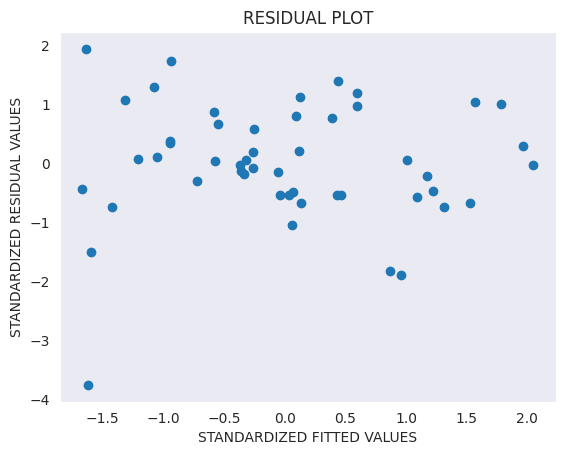

In [21]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('RESIDUAL PLOT')
plt.xlabel("STANDARDIZED FITTED VALUES")
plt.ylabel("STANDARDIZED RESIDUAL VALUES")
plt.show()

eval_env: 1


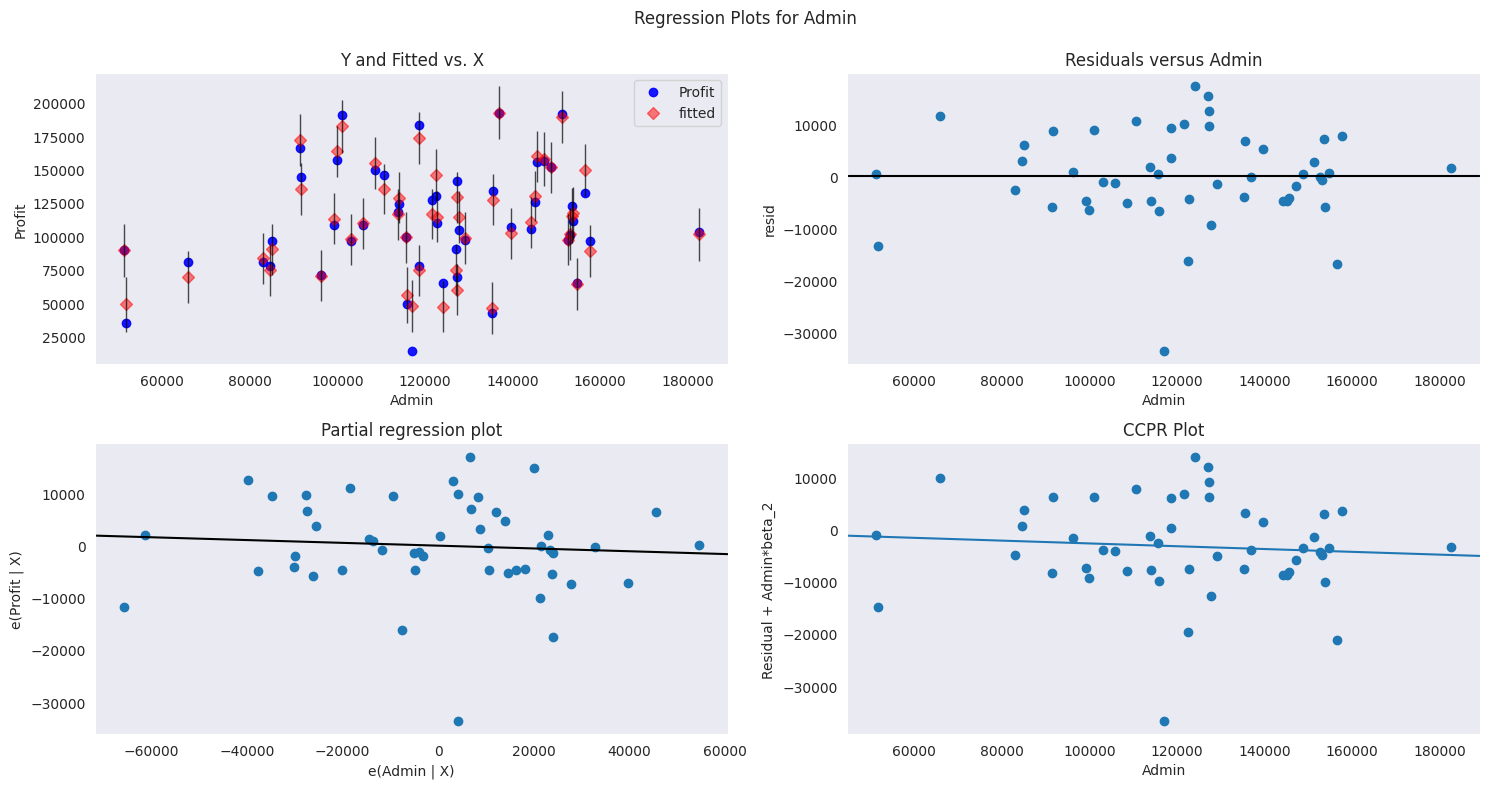

In [22]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Admin",fig=fig)
plt.show()

eval_env: 1


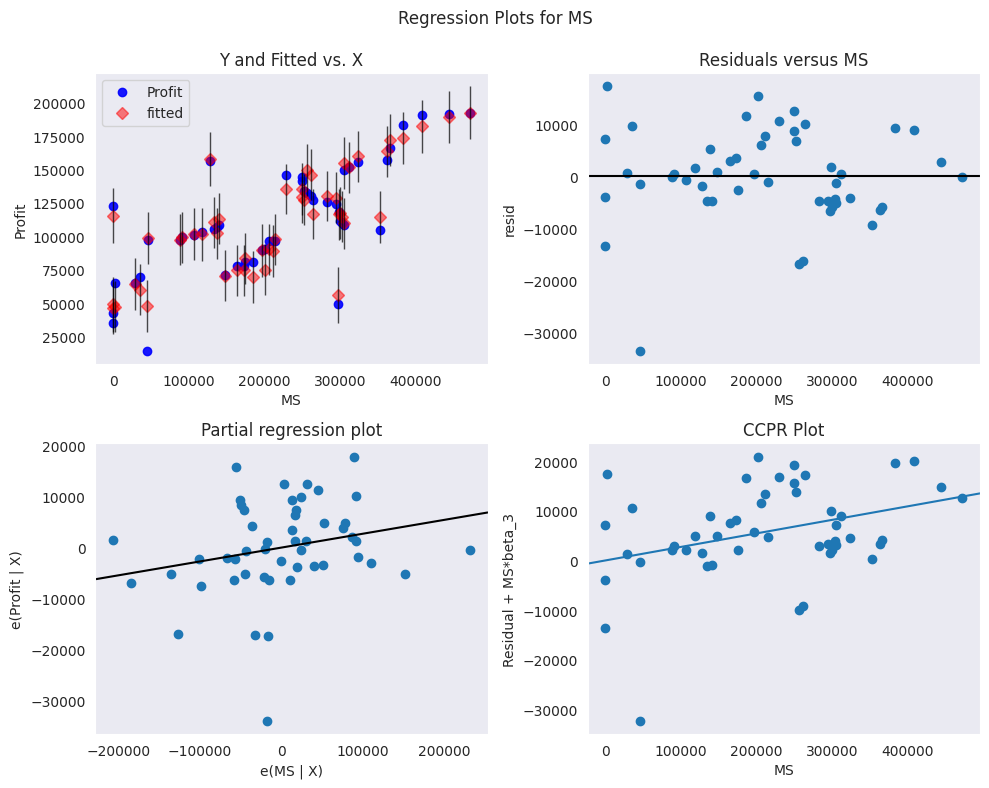

In [23]:
fig=plt.figure(figsize=(10,8))
fig=sm.graphics.plot_regress_exog(model,"MS", fig=fig)
plt.show()

In [24]:
model_influence=model.get_influence()
(c, _)=model_influence.cooks_distance

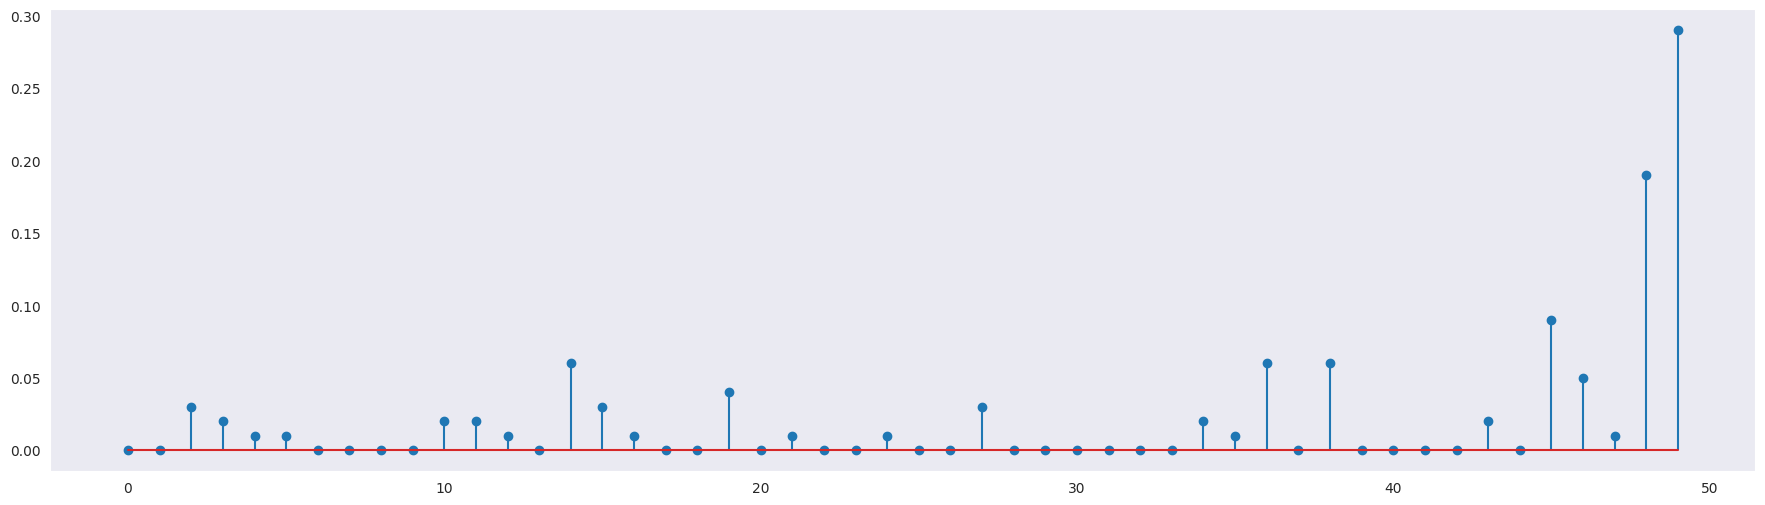

In [25]:
fig=plt.subplots(figsize=(22,6))
plt.stem(np.arange(len(df)),np.round(c,2))
plt.show()

In [26]:
np.argmax(c),np.max(c)

(49, 0.2880822927543272)

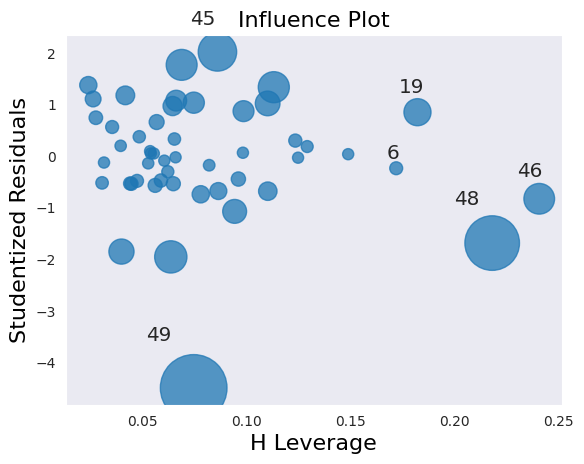

In [27]:
#High Influence Points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [28]:
k=6
n=df.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.42000000000000004

In [29]:
df[df.index.isin([2,6,22])]

,R&D Spend,Administration,Marketing Spend,State,Profit
2,153441.51,101145.55,407934.54,Florida,191050.39
6,134615.46,147198.87,127716.82,California,156122.51
22,73994.56,122782.75,303319.26,Florida,110352.25


In [30]:
#Improving the Model
df_new=pd.read_csv("Startups.csv")

In [31]:
daf=df_new.drop(df_new.index[[2,6]],axis=0).reset_index()

In [32]:
daf=daf.drop(['index'],axis=1) 
daf

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,144372.41,118671.85,383199.62,New York,182901.99
3,142107.34,91391.77,366168.42,Florida,166187.94
4,131876.90,99814.71,362861.36,New York,156991.12
5,130298.13,145530.06,323876.68,Florida,155752.60
6,120542.52,148718.95,311613.29,New York,152211.77
7,123334.88,108679.17,304981.62,California,149759.96
8,101913.08,110594.11,229160.95,Florida,146121.95
9,100671.96,91790.61,249744.55,California,144259.40


In [33]:
daf = df.rename({'R&D Spend': 'RDS','Administration': 'Admin', 'Marketing Spend':'MS'},axis=1)
daf

,RDS,Admin,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [34]:
#Build Model
final=smf.ols('Profit~RDS+Admin+MS',data=daf).fit()
(final.rsquared)

0.9507459940683246

In [35]:
final2=smf.ols('Profit~Admin+MS',data=daf).fit()
final2.rsquared

0.6097229746770665

In [36]:
model1= final.get_influence()
influence1=model1.cooks_distance 

In [37]:
np.argmax(influence1), np.max(influence1)

(81, 0.9999999998204959)

In [38]:
daf1=daf.drop(daf.index[26],axis=0)
print(daf1.shape)
daf1

(49, 5)


,RDS,Admin,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [39]:
model=smf.ols('Profit~Admin+RDS+MS',data=daf).fit()

In [40]:
model.rsquared,model.aic

(0.9507459940683246, 1058.7714985998055)

Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car

Price  -- Offer Price in EUROs	

Age_08_04 -- Age in months as in August 2004	

Mfg_Month -- Manufacturing month (1-12)	

Mfg_Year	-- Manufacturing Year

KM -- Accumulated Kilometers on odometer

Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)

HP -- Horse Power

Met_Color	 -- Metallic Color?  (Yes=1, No=0)

Color -- Color (Blue, Red, Grey, Silver, Black, etc.)

Automatic	-- Automatic ( (Yes=1, No=0)

cc -- Cylinder Volume in cubic centimeters

Doors -- Number of doors

Cylinders	-- Number of cylinders

Gears -- Number of gear positions

Quarterly_Tax -- Quarterly road tax in EUROs

Weight -- Weight in Kilograms

Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)

BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)

Guarantee_Period -- 	Guarantee period in months

ABS -- Anti-Lock Brake System (Yes=1, No=0)

Airbag_1 -- Driver_Airbag  (Yes=1, No=0)

Airbag_2 -- Passenger Airbag  (Yes=1, No=0)

Airco -- Airconditioning  (Yes=1, No=0)

Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)

Boardcomputer -- Boardcomputer  (Yes=1, No=0)

CD_Player -- CD Player  (Yes=1, No=0)

Central_Lock -- Central Lock  (Yes=1, No=0)

Powered_Windows -- Powered Windows  (Yes=1, No=0)

Power_Steering -- Power Steering  (Yes=1, No=0)

Radio -- Radio  (Yes=1, No=0)

Mistlamps	-- Mistlamps  (Yes=1, No=0)

Sport_Model -- Sport Model  (Yes=1, No=0)

Backseat_Divider -- Backseat Divider  (Yes=1, No=0)

Metallic_Rim --Metallic Rim  (Yes=1, No=0)

Radio_cassette -- Radio Cassette  (Yes=1, No=0)

Tow_Bar -- Tow Bar  (Yes=1, No=0)


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm 
from statsmodels.graphics.regressionplots import influence_plot

In [42]:
dt=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
dt

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [43]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [44]:
dt1=pd.concat([dt.iloc[:,2:4],dt.iloc[:,6:7],dt.iloc[:,8:9],dt.iloc[:,12:14],dt.iloc[:,15:18]],axis=1)
dt1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [45]:
dt2=dt1.rename({'Age_08_04':'AGE','cc':'CC','Quarterly_Tax':'QT','Weight':'WT'},axis=1)
dt2

,Price,AGE,KM,HP,CC,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [46]:
dt2[dt2.duplicated()]
daf=dt2.drop_duplicates().reset_index()
daf

,index,Price,AGE,KM,HP,CC,Doors,Gears,QT,WT
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [47]:
daf.describe()

,index,Price,AGE,KM,HP,CC,Doors,Gears,QT,WT
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,717.921254,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,414.518894,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,0.000000,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,359.500000,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,718.000000,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,1076.500000,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,1435.000000,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [48]:
daf.corr()

,index,Price,AGE,KM,HP,CC,Doors,Gears,QT,WT
index,1.000000,-0.738819,0.906315,0.272120,-0.108513,-0.116836,-0.129379,-0.043446,-0.238495,-0.413300
Price,-0.738819,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
AGE,0.906315,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,0.272120,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,-0.108513,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,-0.116836,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,-0.129379,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,-0.043446,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,-0.238495,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
WT,-0.413300,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


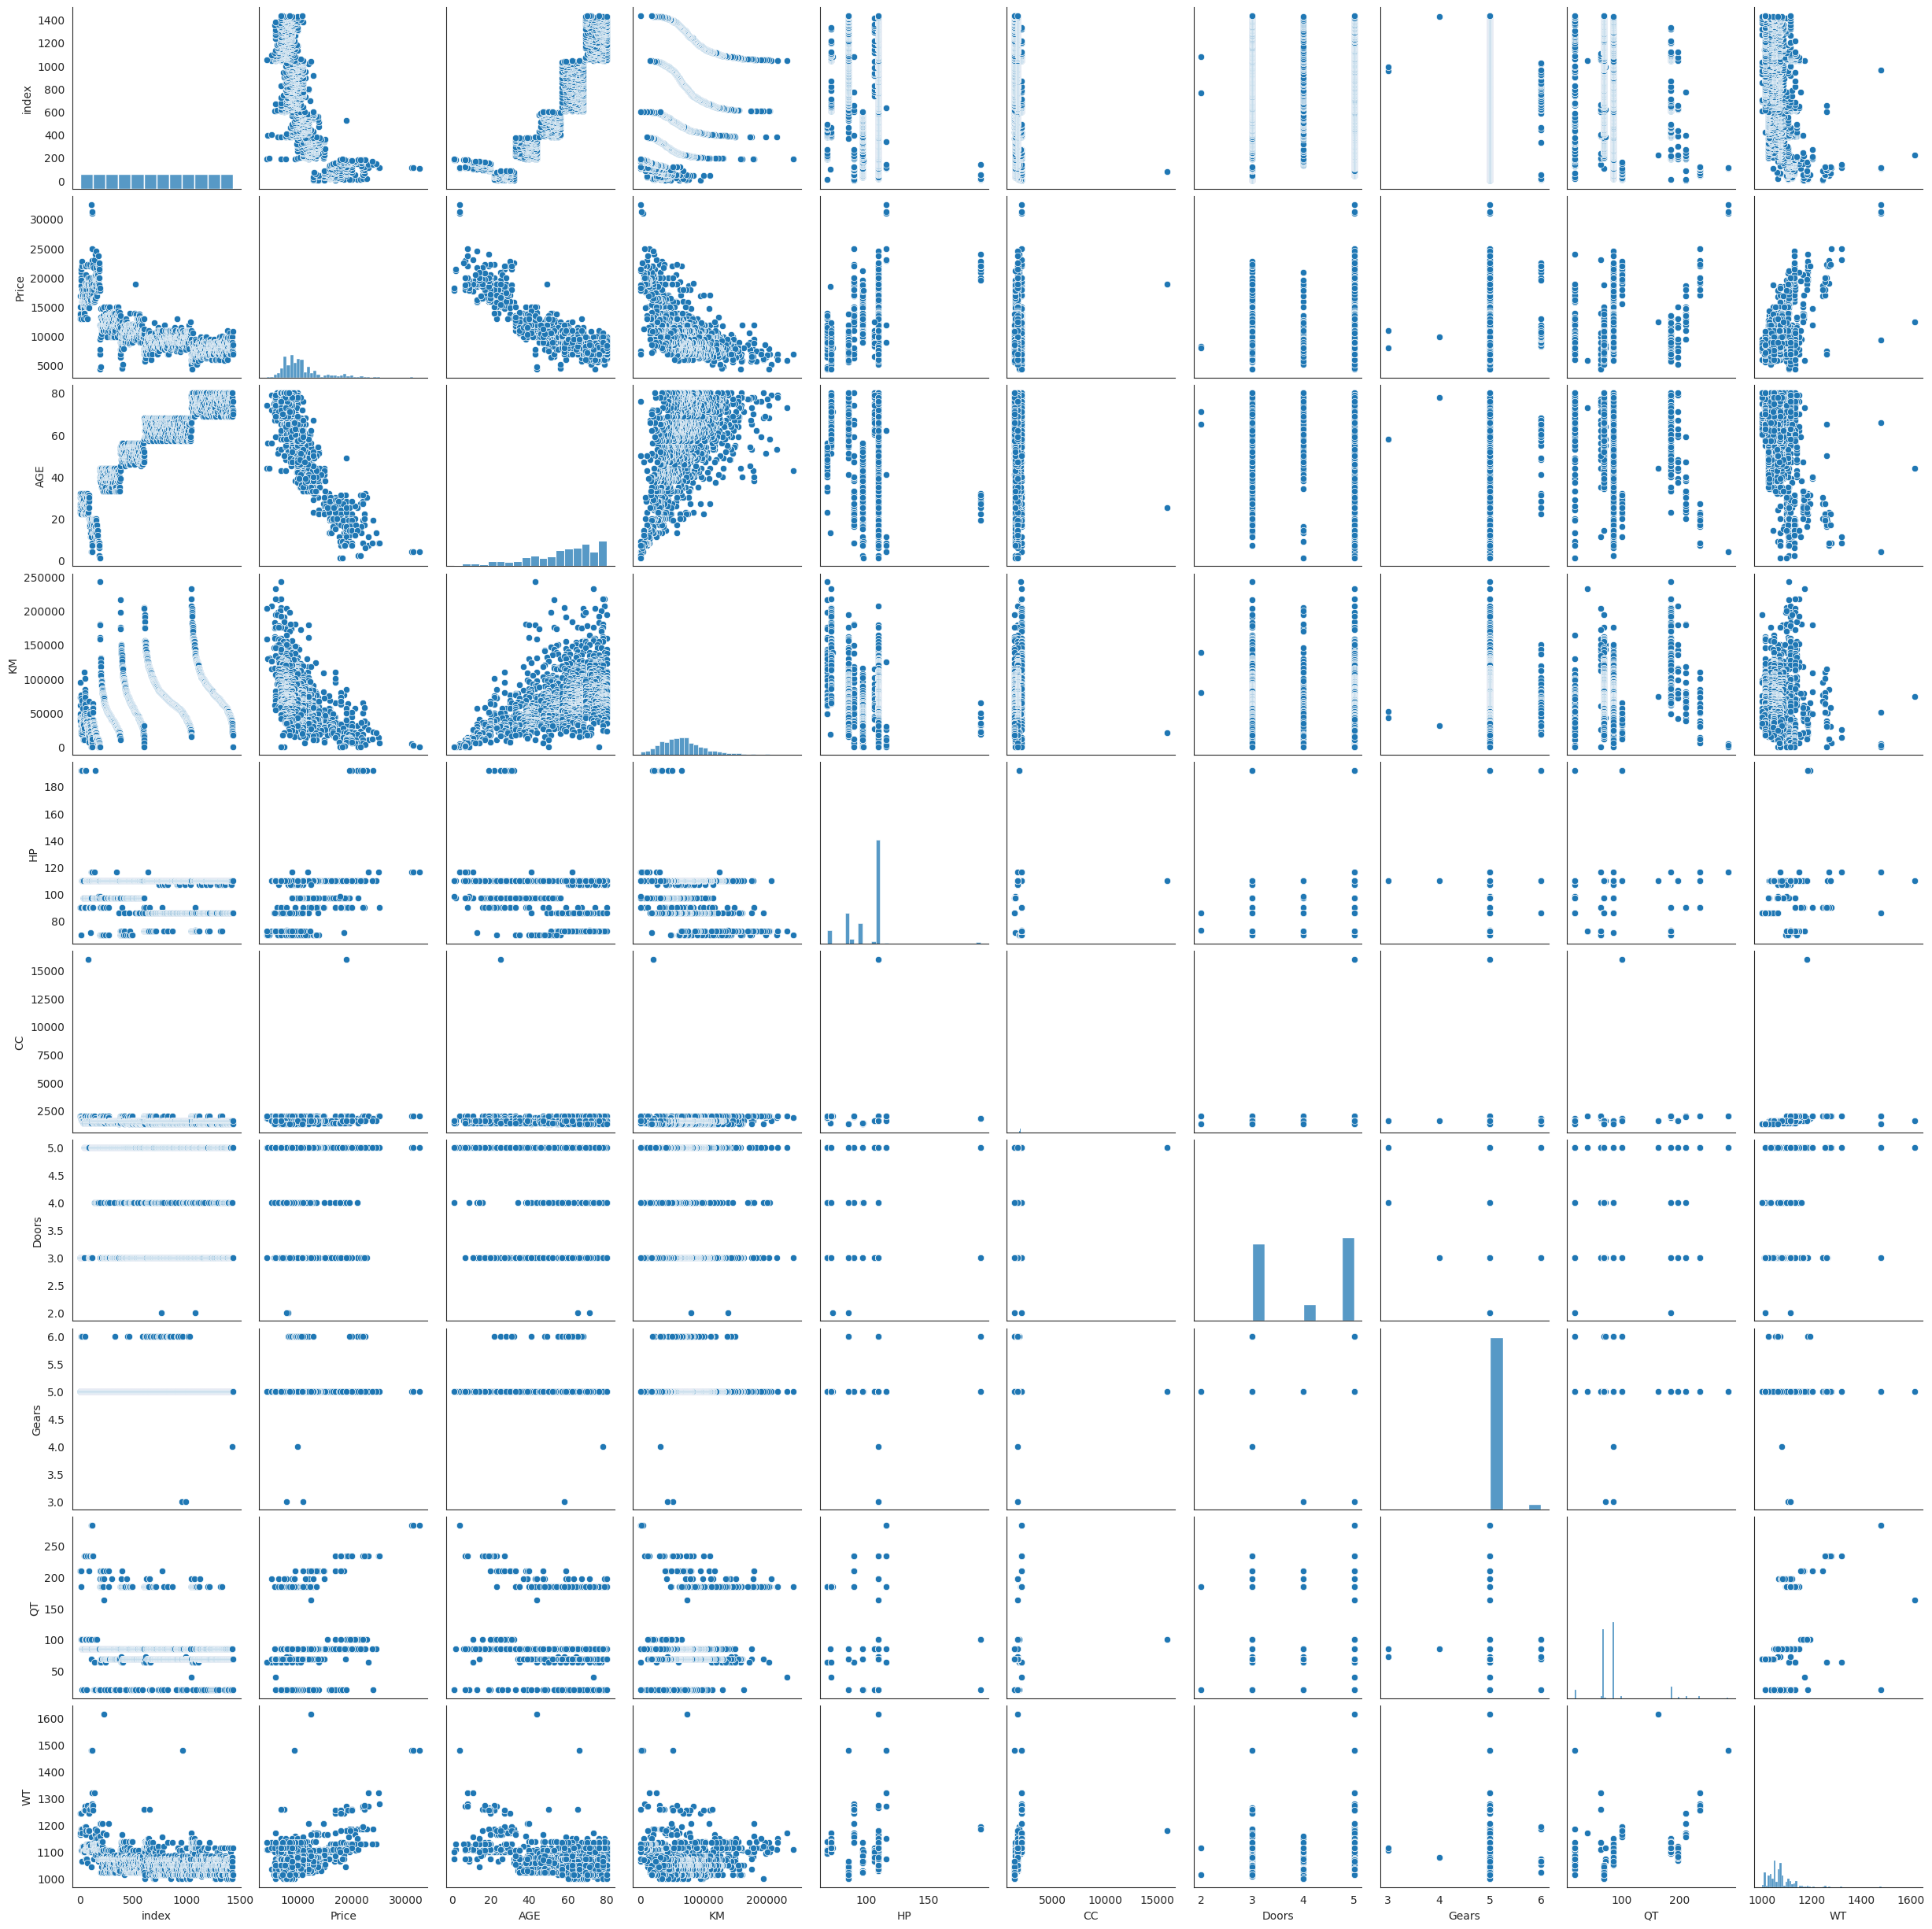

In [49]:
sns.set_style(style='white')
sns.pairplot(daf)

In [50]:
#Building a Model
model=smf.ols('Price~AGE+KM+HP+CC+Doors+Gears+QT+WT',data=daf).fit()

In [51]:
model.params

Intercept   -5472.540368
AGE          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
WT             16.855470
dtype: float64

In [52]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:11:40   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
AGE         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
WT            16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
slr_c =smf.ols('Price~CC',data=daf).fit()
slr_c.tvalues, slr_c.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [54]:
slr_a =smf.ols('Price~AGE',data=daf).fit()
slr_a.tvalues, slr_a.pvalues

(Intercept    138.818198
 AGE          -68.846693
 dtype: float64,
 Intercept    0.0
 AGE          0.0
 dtype: float64)

In [55]:
mlr_c_d_w=smf.ols('Price~CC+Doors+WT',data=daf).fit()
mlr_c_d_w.tvalues, mlr_c_d_w.pvalues

(Intercept   -20.141432
 CC           -3.371206
 Doors         0.397587
 WT           25.068060
 dtype: float64,
 Intercept     1.246119e-79
 CC            7.683455e-04
 Doors         6.909939e-01
 WT           2.874983e-115
 dtype: float64)

In [56]:
#MODEL VALIDATION TECHNIQUES
rsq_AGE=smf.ols('AGE~KM+HP+CC+Doors+Gears+QT+WT',data=daf).fit().rsquared
vif_AGE=1/(1 - rsq_AGE)

rsq_KM=smf.ols('KM~AGE+HP+CC+Doors+Gears+QT+WT',data=daf).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~AGE+KM+CC+Doors+Gears+QT+WT',data=daf).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~HP+AGE+KM+Doors+Gears+QT+WT',data=daf).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_Doors=smf.ols('Doors~HP+AGE+CC+KM+Gears+QT+WT',data=daf).fit().rsquared
vif_Doors=1/(1-rsq_Doors)

rsq_Gears=smf.ols('Gears~AGE+CC+HP+KM+Doors+QT+WT ',data=daf).fit().rsquared
vif_Gears=1/(1-rsq_Gears)

rsq_QT=smf.ols('QT~KM+CC+HP+Doors+Gears+WT+AGE',data=daf).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('WT~AGE+CC+HP+KM+QT+Doors+Gears',data=daf).fit().rsquared
vif_WT=1/(1-rsq_WT)

mvt={'VARIABLES':['AGE',"KM",'HP','CC','Doors','Gears','WT','QT'],
     'VIF':[vif_AGE,vif_KM,vif_HP,vif_CC,vif_Doors,vif_Gears,vif_WT,vif_QT]}
vif_df=pd.DataFrame(mvt)
vif_df

,VARIABLES,VIF
0,AGE,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,WT,2.487180
7,QT,2.295375


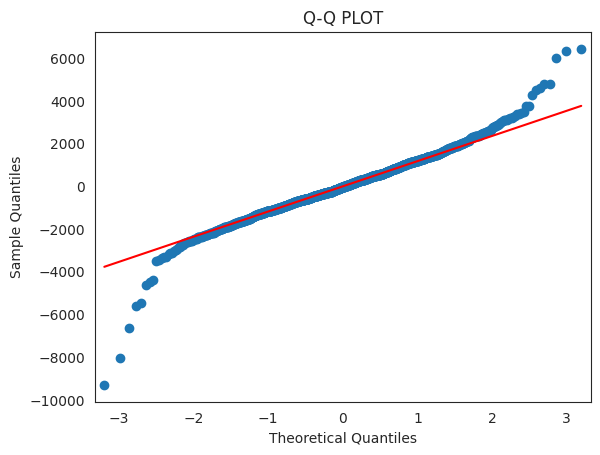

In [57]:
#RESIDUAL ANALYSIS
sm.qqplot(model.resid,line='q')
plt.title("Q-Q PLOT")
plt.show()

In [58]:
list(np.where(model.resid>2000))

[array([  14,   16,   19,   49,   52,   53,   62,   63,   64,   66,   68,
          72,   74,   76,   77,   80,   89,   91,  106,  109,  110,  111,
         112,  114,  118,  122,  124,  138,  140,  145,  146,  148,  150,
         153,  160,  166,  170,  173,  177,  178,  222,  353,  467,  522,
         556,  655,  672,  692,  695,  795,  839,  912, 1053, 1057, 1058,
        1061, 1078, 1080, 1089, 1102, 1130, 1132, 1141, 1149, 1174, 1183,
        1188, 1195, 1210, 1213, 1239, 1249, 1279, 1326, 1377, 1382, 1401,
        1431])]

In [59]:
def standard_values(vals):return (vals-vals.mean())/vals.std()

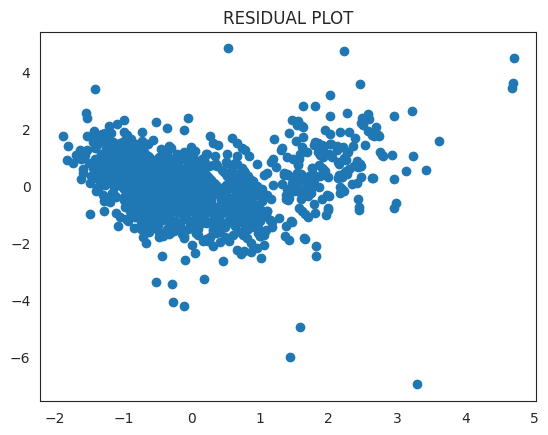

In [60]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title("RESIDUAL PLOT")
plt.show()

eval_env: 1


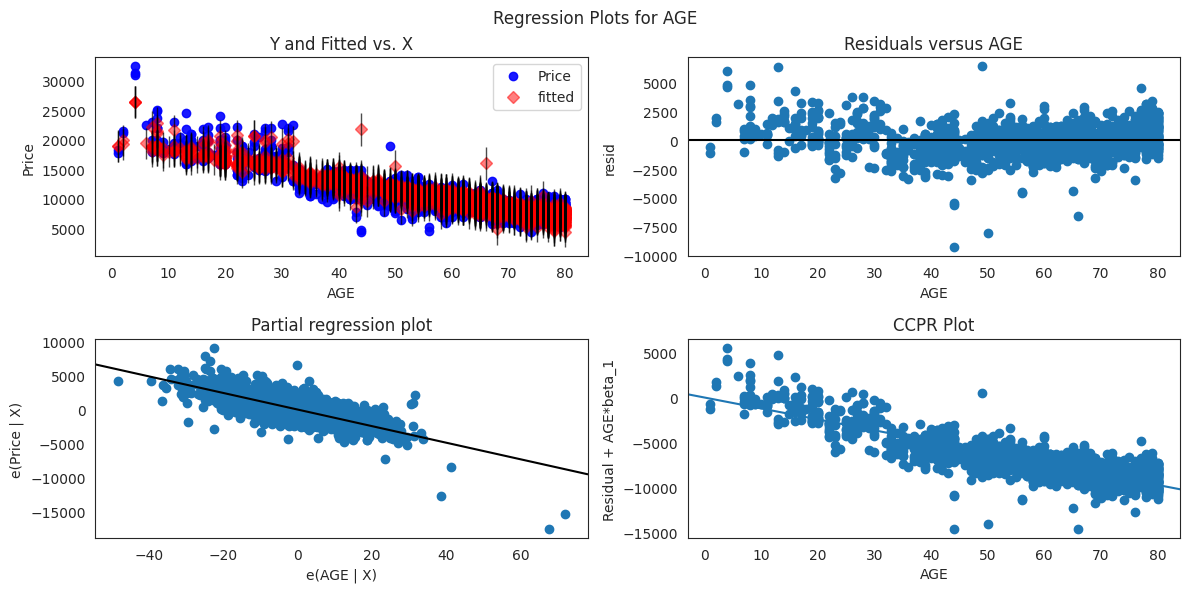

In [61]:
fig=plt.figure(figsize=(12,6))
sm.graphics.plot_regress_exog(model,'AGE',fig=fig)
plt.show()

eval_env: 1


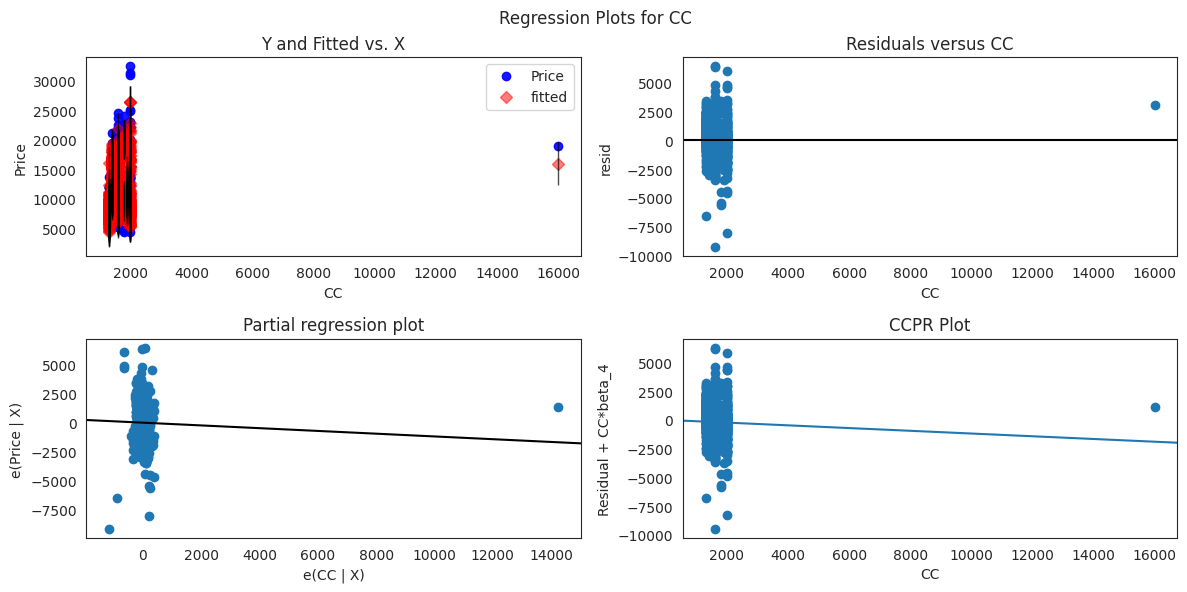

In [62]:
fig=plt.figure(figsize=(12,6))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

In [63]:
(cd,_)=model.get_influence().cooks_distance
cd

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

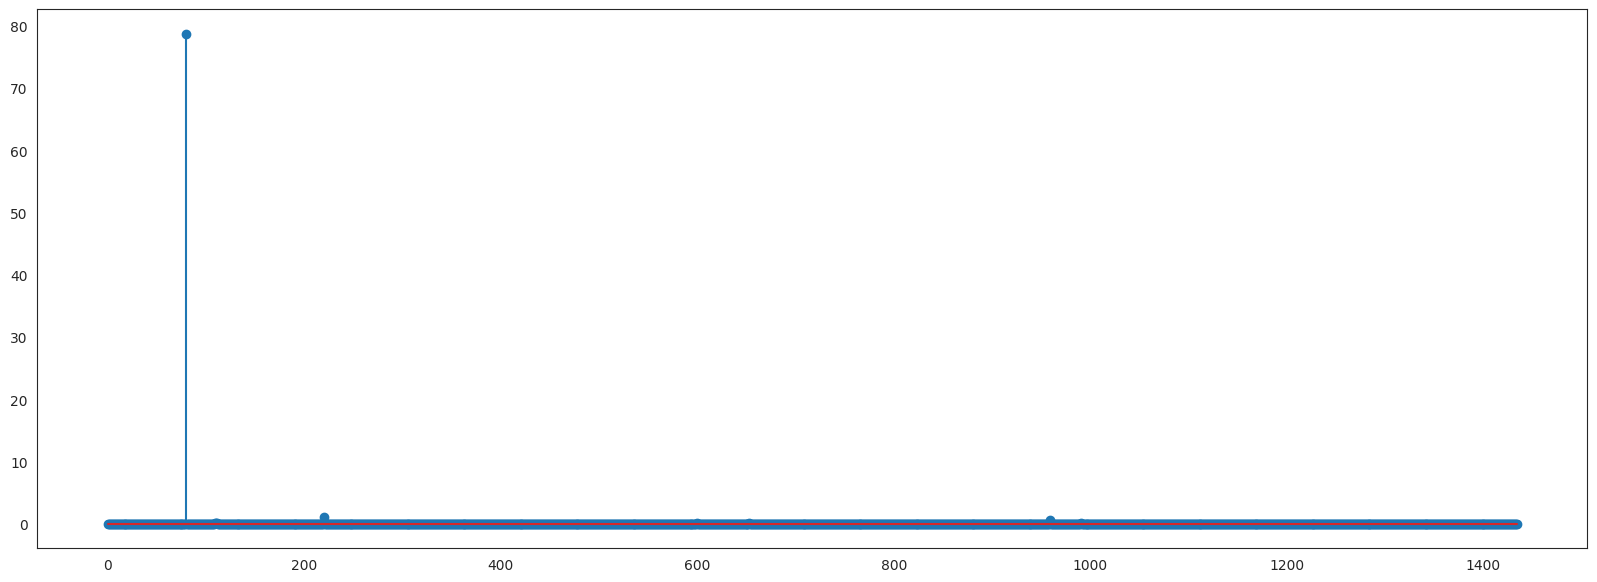

In [64]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(daf)),np.round(cd,6))
plt.show()

In [65]:
np.argmax(cd), np.max(cd)

(80, 78.72950582258932)

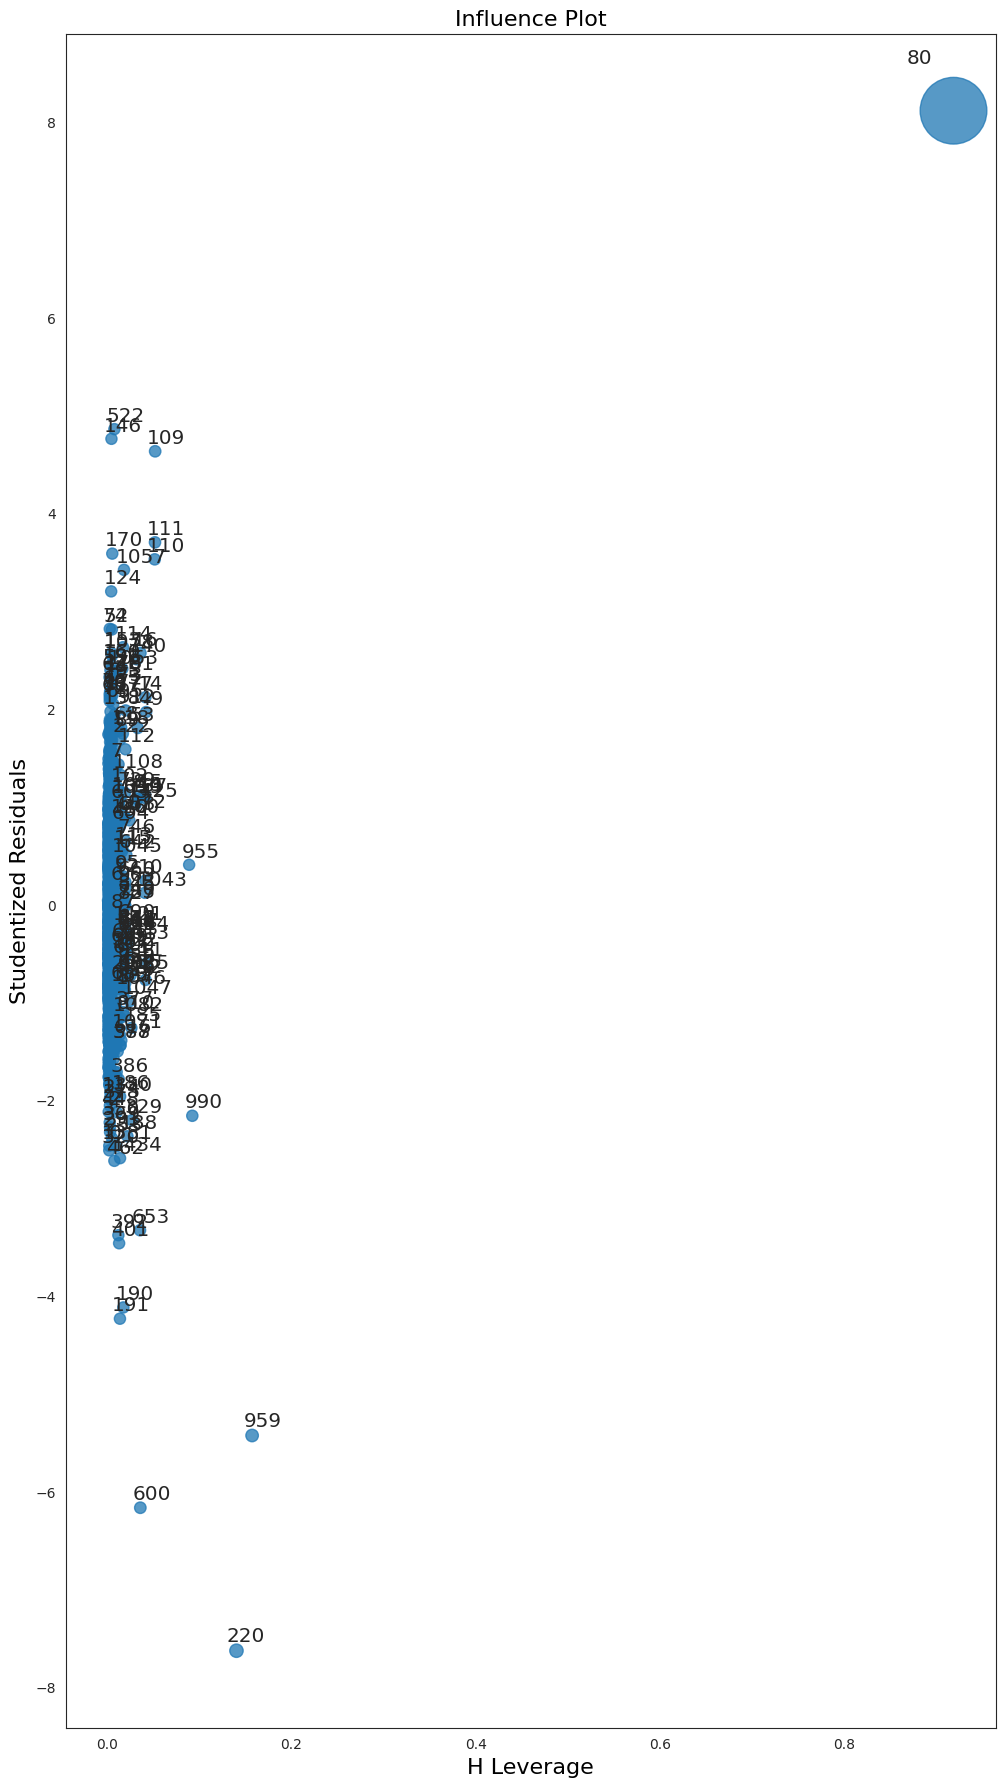

In [66]:
fig,ax=plt.subplots(figsize=(12,22))
fig=influence_plot(model,ax=ax)

In [67]:
x=daf.shape[0]
y=daf.shape[1]
leverage_cutoff=(3*(x+1))/y
leverage_cutoff 

430.8

In [68]:
daf[daf.index.isin([22])]

,index,Price,AGE,KM,HP,CC,Doors,Gears,QT,WT
22,22,15950,28,56349,110,1600,3,5,85,1120


In [69]:
#IMPROVING THE MODEL
daf1=daf.copy()
daf1

,index,Price,AGE,KM,HP,CC,Doors,Gears,QT,WT
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [70]:
daf2=daf1.drop(daf1.index[[22]],axis=0).reset_index(drop=True)
daf2

,index,Price,AGE,KM,HP,CC,Doors,Gears,QT,WT
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1429,1431,7500,69,20544,86,1300,3,5,69,1025
1430,1432,10845,72,19000,86,1300,3,5,69,1015
1431,1433,8500,71,17016,86,1300,3,5,69,1015
1432,1434,7250,70,16916,86,1300,3,5,69,1015


In [71]:
model_f=smf.ols('Price~AGE+KM+HP+CC+Doors+Gears+QT+WT', data=daf2).fit()

In [72]:
model_f.rsquared

0.8623330071933746